### Imabalancd Dataset
- LogisticRegression
- SVM
- XGBoost
- Tensorflow Neuralnet

In [1]:
import numpy as np
import pandas as pd

In [2]:
## Reading Data
def read_data(file):
    try:
        data=pd.read_csv(file)
        return data
    except FileNotFoundError as e:
        print('file not found',e)
        

In [3]:
file='E:\\Datasets\\classification\\train.csv'
data=read_data(file)
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.shape

(381109, 12)

## EDA 

In [5]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Response', ylabel='count'>

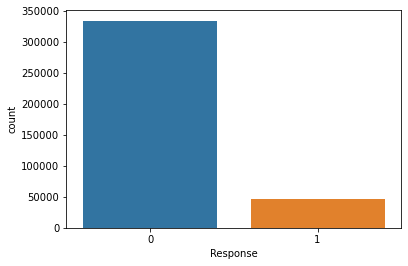

In [7]:
sns.countplot(data['Response'])

In [8]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

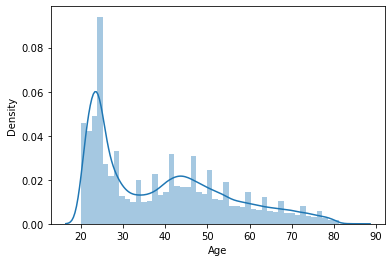

In [9]:
## age distribution
sns.distplot(data['Age'])

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

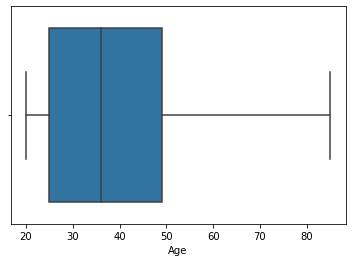

In [10]:
sns.boxplot(data['Age'])

In [11]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [12]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

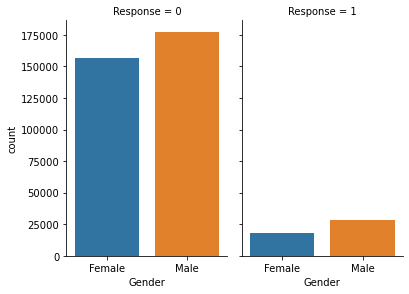

In [13]:
df=data.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

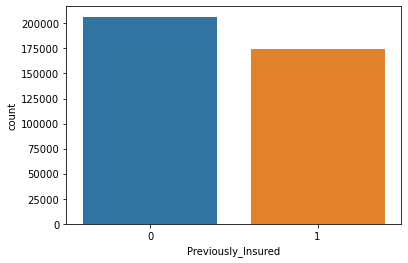

In [14]:
# Previously_Insured

sns.countplot(data['Previously_Insured'])

In [15]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

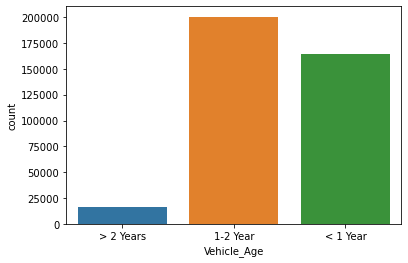

In [16]:
## Vehicle_Age

sns.countplot(data['Vehicle_Age'])

In [17]:
## vehicle age and response
dfage=data.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
dfage

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


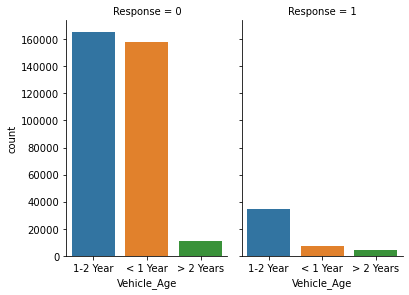

In [18]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=dfage, kind="bar",
                height=4, aspect=.7);

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

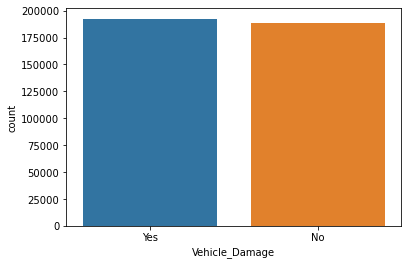

In [19]:
sns.countplot(data['Vehicle_Damage'])

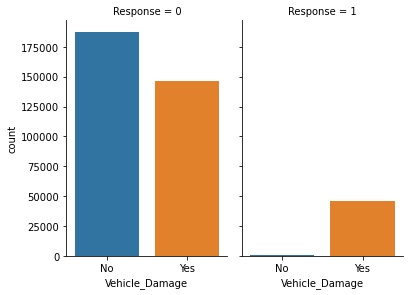

In [20]:
dDamage=data.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=dDamage, kind="bar",
                height=4, aspect=.7);

In [21]:
dDamage

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


C:\Users\USER\anaconda3\envs\env22\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

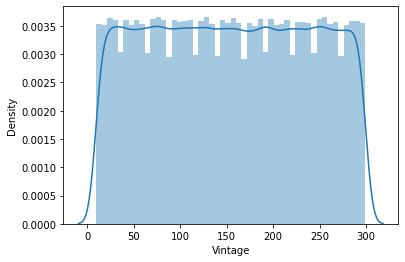

In [22]:
sns.distplot(data.Vintage)

## Data preprocessing

In [23]:
target=data['Response']
feature=data.drop('Response',axis=1)

In [24]:
numerical_feature=data.select_dtypes(include=['Int64','float32','float64','Int32']) 
categorical=data.select_dtypes(include='object')
cat_train=pd.get_dummies(categorical)

In [25]:
numerical_clean=numerical_feature.drop('id',axis=1)

In [26]:
train_data=pd.concat([numerical_clean,cat_train],axis=1)
train_data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0
2,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
mscale=MinMaxScaler()
mscale.fit(train_data)
scaled_data=mscale.transform(train_data)

In [28]:
scaled_data[1]

array([0.86153846, 1.        , 0.05769231, 0.        , 0.05749579,
       0.15432099, 0.59861592, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ])

In [29]:
## data spliting and samling
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_data,target,test_size=0.2,random_state=20)

In [30]:
## model 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
logistic_pred=model.predict(x_test)

In [32]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,auc
print(classification_report(logistic_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66874
           1       1.00      1.00      1.00      9348

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222



In [33]:
accuracy_score(logistic_pred,y_test)

1.0

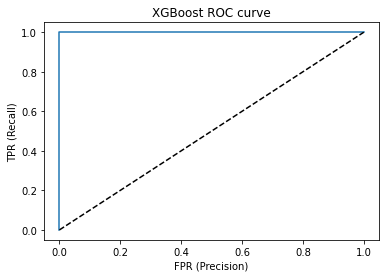

Area under curve (AUC):  1.0


In [34]:
fpr, tpr, _ = roc_curve(logistic_pred,y_test)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## SVM model

In [35]:

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
svm_pred=svm_model.predict(x_test)

In [37]:
print(classification_report(svm_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66874
           1       1.00      1.00      1.00      9348

    accuracy                           1.00     76222
   macro avg       1.00      1.00      1.00     76222
weighted avg       1.00      1.00      1.00     76222



In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(svm_pred,y_test)

array([[66874,     0],
       [    0,  9348]], dtype=int64)

In [39]:
target.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## managing Imbalanced Dataset (SMOTE) 

In [40]:
imbalanced_feature=feature
imbalanced_target=target
imbalanced_Dataframe=pd.concat([imbalanced_feature,imbalanced_target],axis=1)

In [41]:
imbalanced_Dataframe.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [42]:
Dataframe_zero=imbalanced_Dataframe[imbalanced_Dataframe['Response']==0]
Dataframe_one=imbalanced_Dataframe[imbalanced_Dataframe['Response']==1]

In [43]:
Dataframe_one.shape,Dataframe_zero.shape

((46710, 12), (334399, 12))

In [44]:
Y=train_data['Response']
X=train_data.drop('Response',axis=1)

In [59]:
X.shape

(381109, 14)

In [45]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_sm,y_sm=smote.fit_resample(X,Y)

In [46]:
## scalling 
from sklearn.preprocessing import MinMaxScaler
xgScal=MinMaxScaler()
xgScal.fit(X_sm.values)
scaledxgboost=xgScal.transform(X_sm.values)

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(scaledxgboost,y_sm.values,test_size=0.2,stratify=y_sm)

In [48]:
balanced_model=LogisticRegression()
balanced_model.fit(X_train,Y_train)

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [49]:
balanced_pred=balanced_model.predict(X_test)

In [50]:
print(classification_report(Y_test,balanced_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84     66880
           1       0.82      0.89      0.85     66880

    accuracy                           0.85    133760
   macro avg       0.85      0.85      0.85    133760
weighted avg       0.85      0.85      0.85    133760



In [51]:
accuracy_score(Y_test,balanced_pred)

0.8458732057416268

In [52]:
## XGB Model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb_model.fit(X_train,Y_train)

C:\Users\USER\anaconda3\envs\env22\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [53]:
xgb_predict=xgb_model.predict(X_test)

In [54]:
print(classification_report(Y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     66880
           1       0.94      0.87      0.90     66880

    accuracy                           0.91    133760
   macro avg       0.91      0.91      0.91    133760
weighted avg       0.91      0.91      0.91    133760



In [55]:
accuracy_score(Y_test,xgb_predict)

0.9086872009569378

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,xgb_predict)

array([[63410,  3470],
       [ 8744, 58136]], dtype=int64)

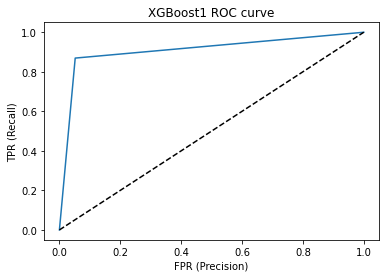

Area under curve (AUC):  0.9086872009569379


In [57]:
import matplotlib.pyplot as plx
fpr, tpr, _ = roc_curve(Y_test,xgb_predict)

plx.title('XGBoost1 ROC curve')
plx.xlabel('FPR (Precision)')
plx.ylabel('TPR (Recall)')

plx.plot(fpr,tpr)
plx.plot((0,1), ls='dashed',color='black')
plx.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

## Tensorflow Model

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential

In [62]:
model=Sequential()
model.add(layers.Dense(64,activation='relu',input_dim=(14)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=100,verbose=2)

Train on 535038 samples
Epoch 1/100
535038/535038 - 79s - loss: 0.2813 - accuracy: 0.8462
Epoch 2/100
535038/535038 - 64s - loss: 0.2746 - accuracy: 0.8507
Epoch 3/100
535038/535038 - 64s - loss: 0.2733 - accuracy: 0.8514
Epoch 4/100
535038/535038 - 66s - loss: 0.2728 - accuracy: 0.8522
Epoch 5/100
535038/535038 - 69s - loss: 0.2716 - accuracy: 0.8525
Epoch 6/100
535038/535038 - 71s - loss: 0.2713 - accuracy: 0.8532
Epoch 7/100
535038/535038 - 79s - loss: 0.2707 - accuracy: 0.8535
Epoch 8/100
535038/535038 - 77s - loss: 0.2704 - accuracy: 0.8538
Epoch 9/100
535038/535038 - 79s - loss: 0.2697 - accuracy: 0.8537
Epoch 10/100
535038/535038 - 85s - loss: 0.2693 - accuracy: 0.8541
Epoch 11/100
535038/535038 - 88s - loss: 0.2691 - accuracy: 0.8543
Epoch 12/100
535038/535038 - 95s - loss: 0.2684 - accuracy: 0.8547
Epoch 13/100
